In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import random
import math

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import copy
x_tmp = copy.deepcopy(x_test[0])

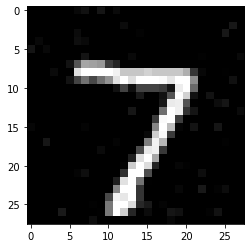

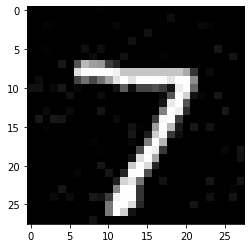

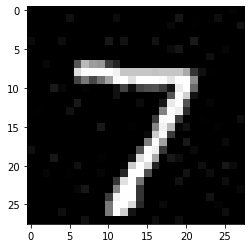

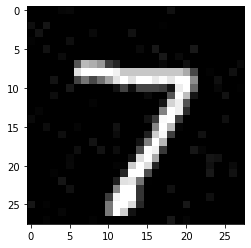

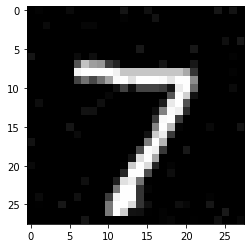

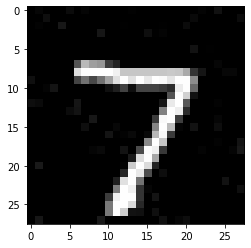

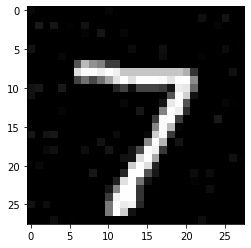

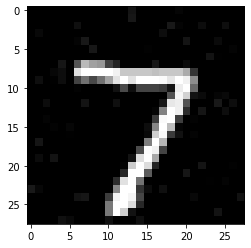

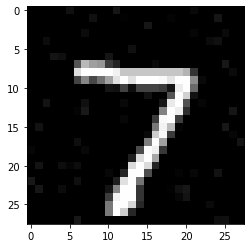

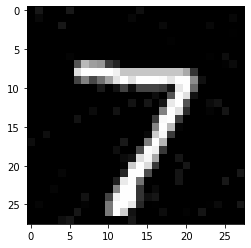

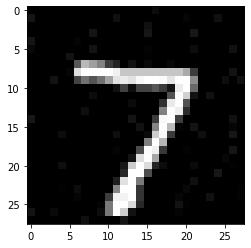

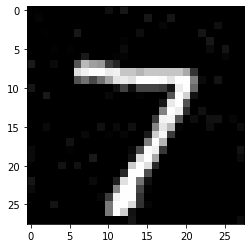

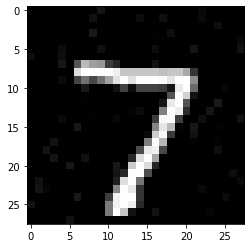

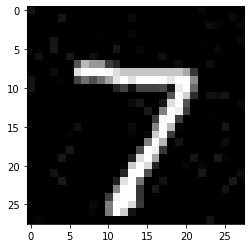

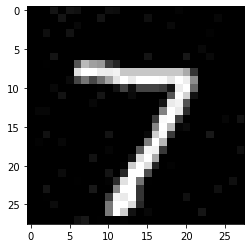

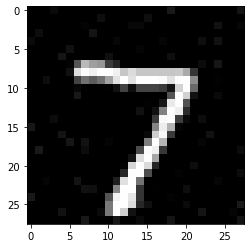

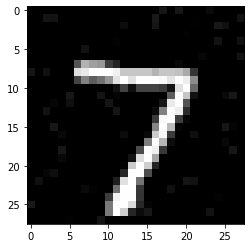

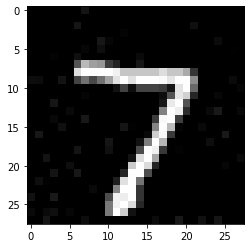

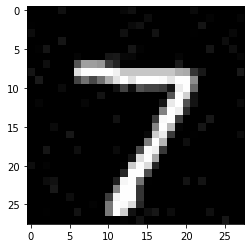

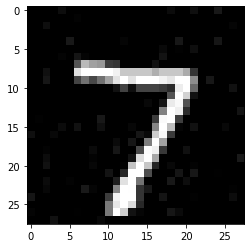

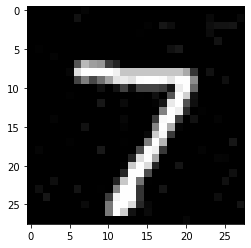

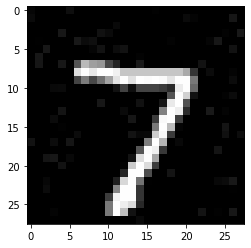

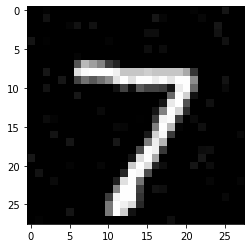

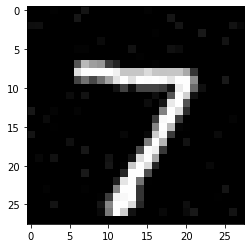

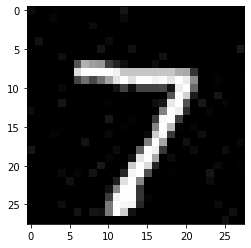

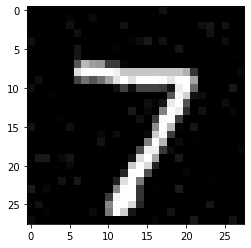

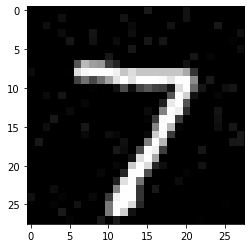

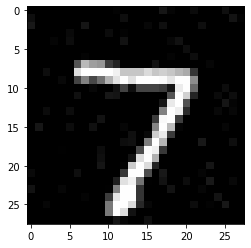

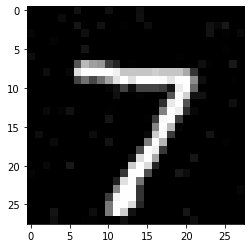

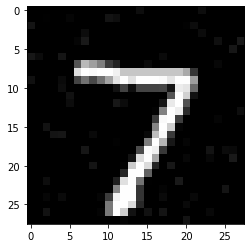

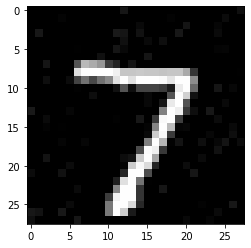

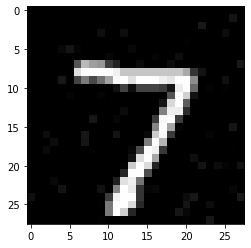

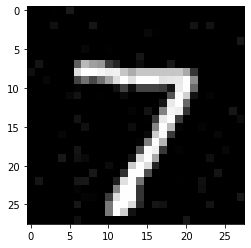

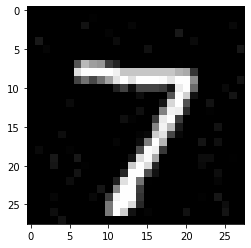

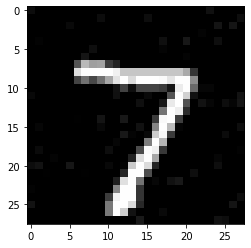

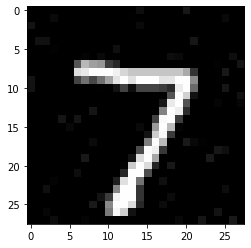

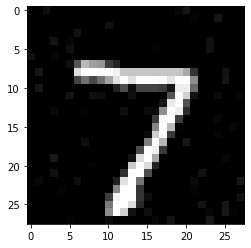

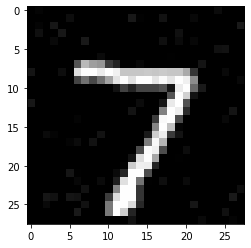

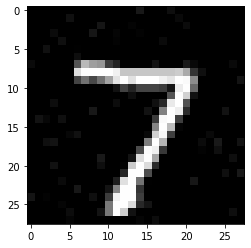

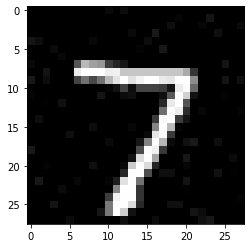

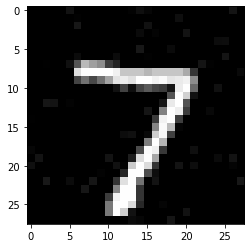

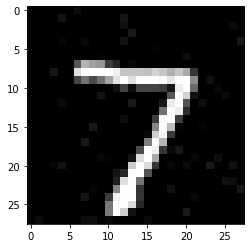

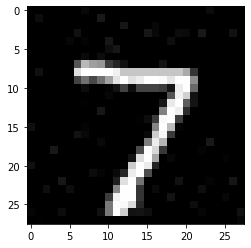

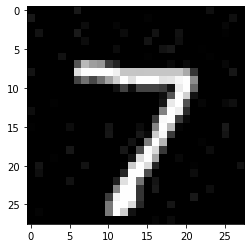

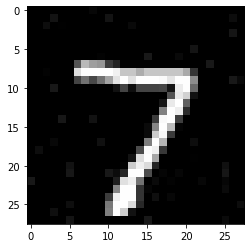

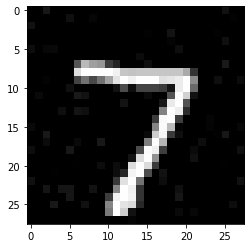

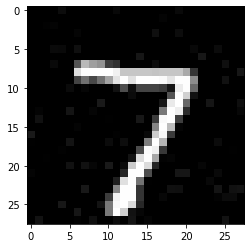

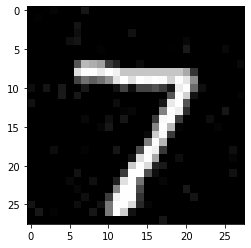

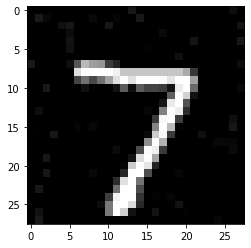

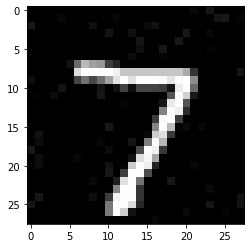

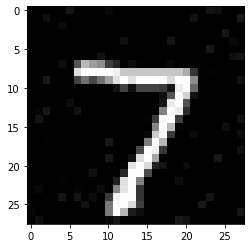

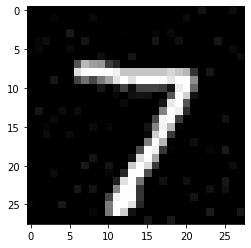

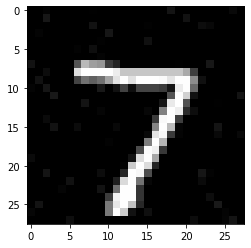

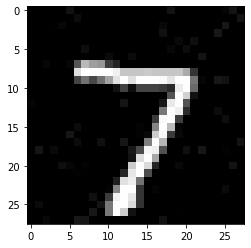

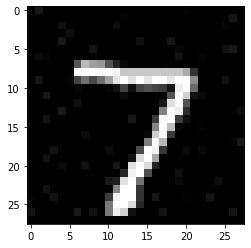

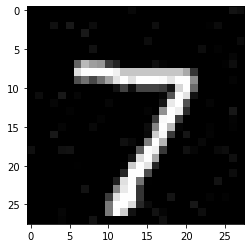

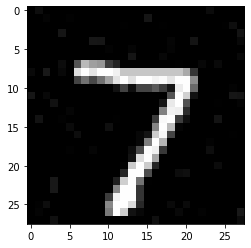

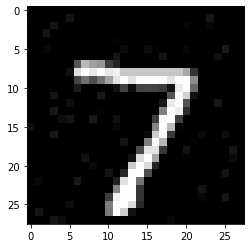

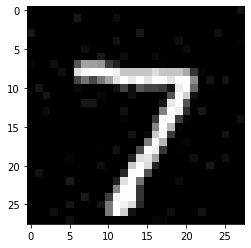

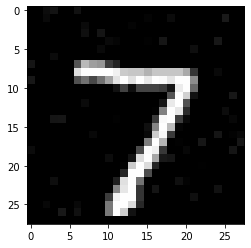

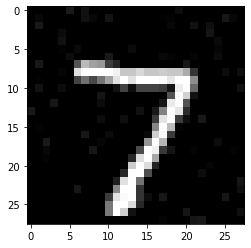

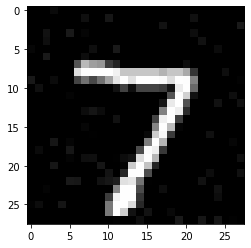

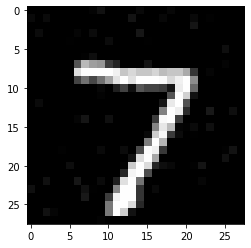

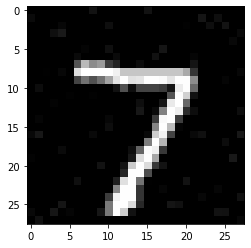

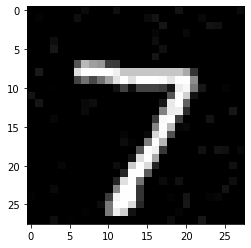

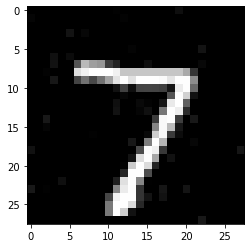

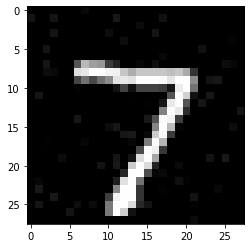

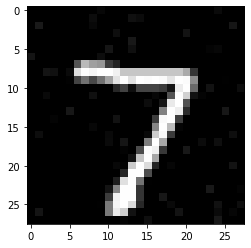

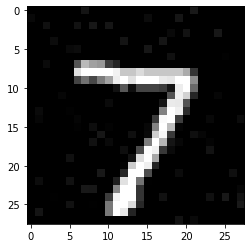

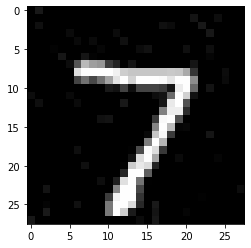

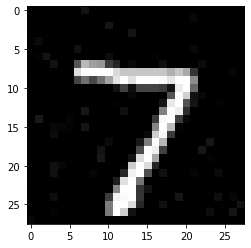

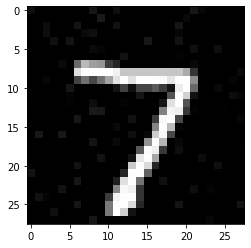

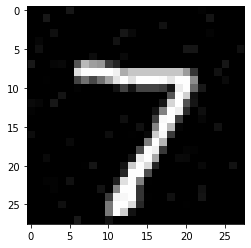

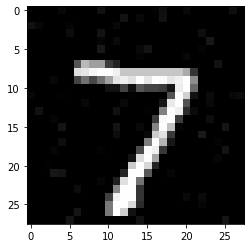

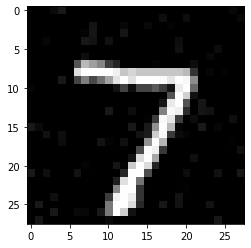

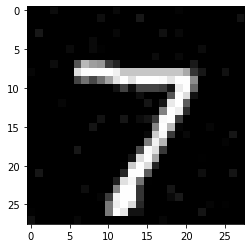

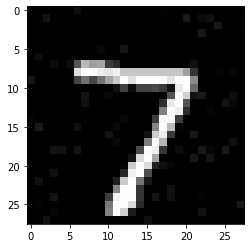

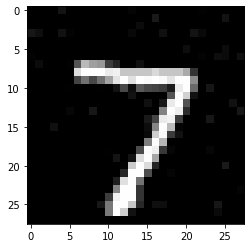

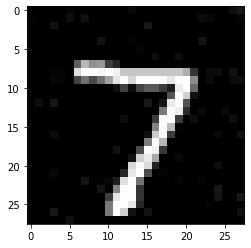

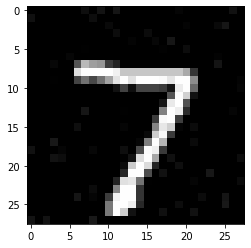

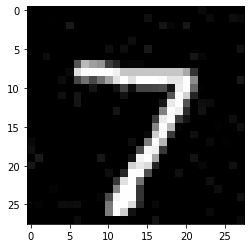

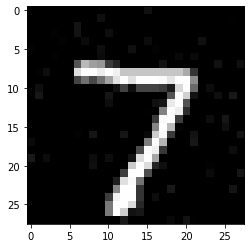

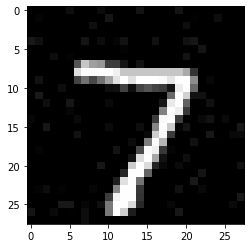

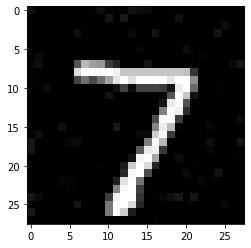

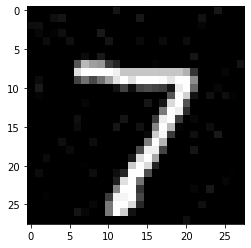

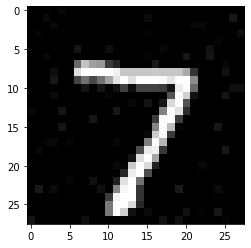

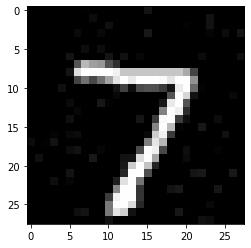

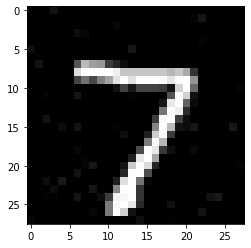

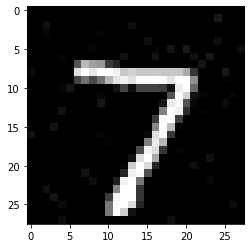

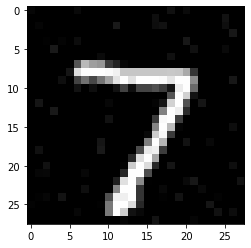

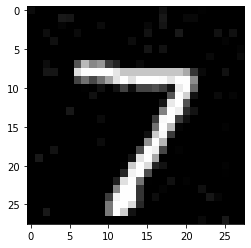

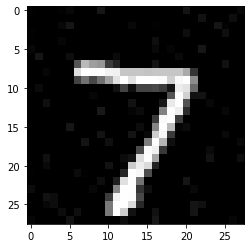

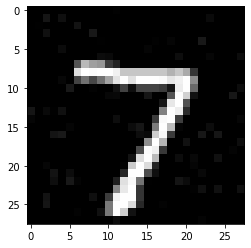

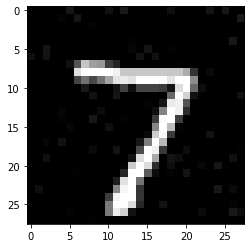

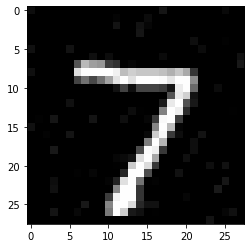

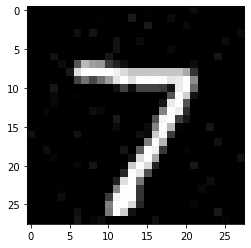

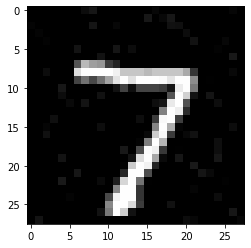

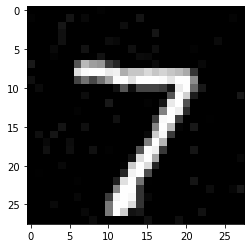

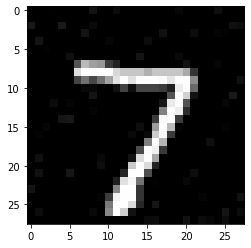

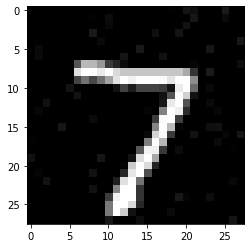

In [4]:
#产生扰动种群（强度50%）
x_des = []
for r in range(100):
    for i in range(28):
        for j in range(28):
            x= random.randint(0,10000)/10000
            if x <= 0.1:
                if x_test[0][i,j] <= 127:
                    x_tmp[i,j] += 255*0.1*random.randint(0,1000)/1000
                elif x_test[0][i,j] > 127 and x_test[0][i,j] < 229:
                    y = random.randint(0,10000)/10000
                    if y <= 0.5:
                        x_tmp[i,j] += 255*0.1*random.randint(0,1000)/1000
                    else:
                        x_tmp[i,j] -= 255*0.1*random.randint(0,1000)/1000
                elif x_test[0][i,j] >= 229:
                    x_tmp[i,j] -= 255*0.1*random.randint(0,1000)/1000
    x_t = x_tmp/255-x_test[0]/255
    #x_des.append(np.array (x_t.reshape(1,784)))
    x_des.append(np.array(x_t.reshape(1,784)))
    plt.imshow(x_tmp,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_test[0])

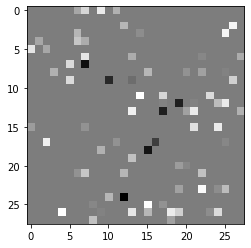

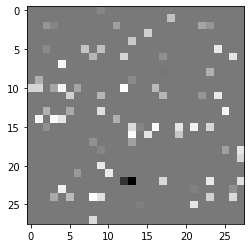

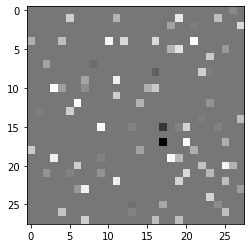

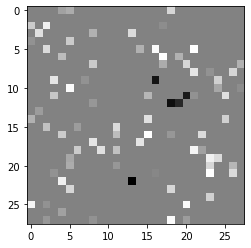

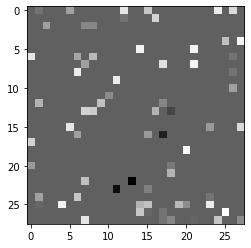

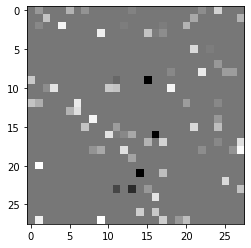

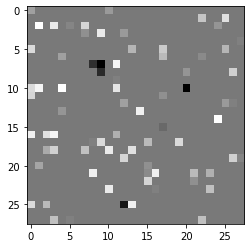

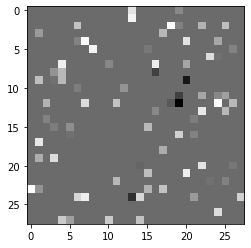

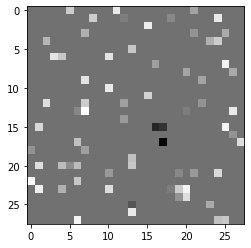

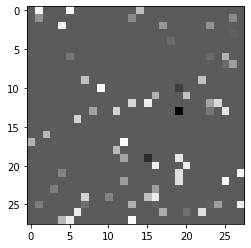

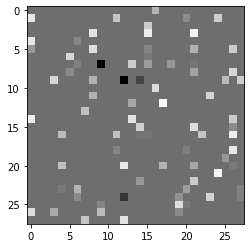

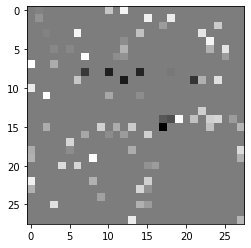

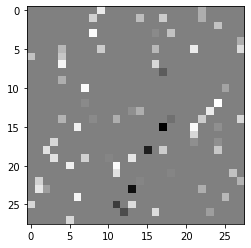

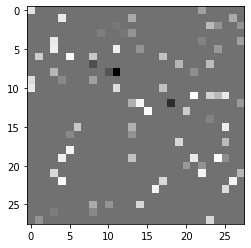

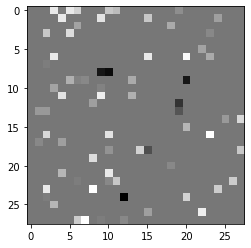

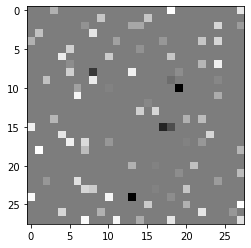

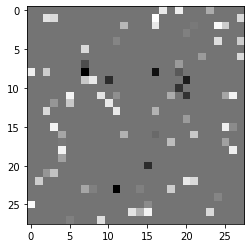

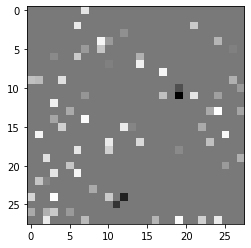

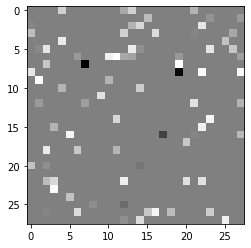

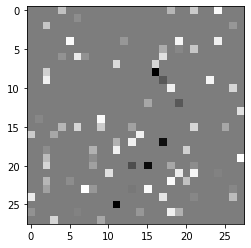

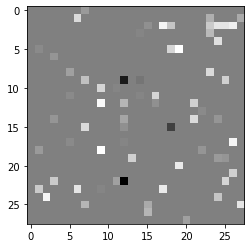

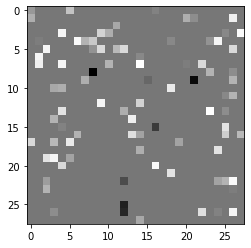

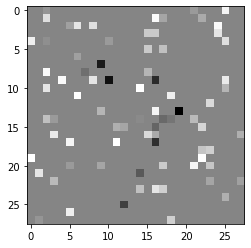

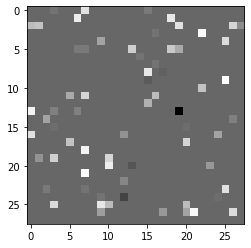

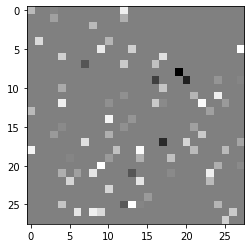

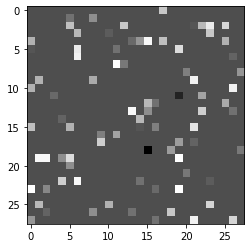

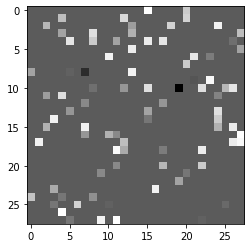

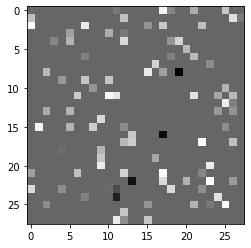

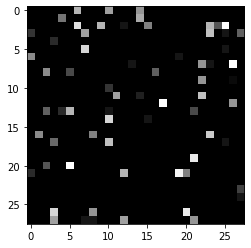

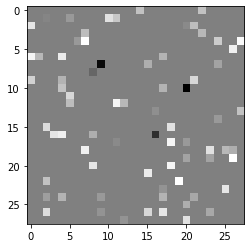

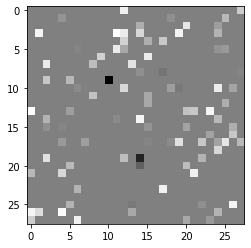

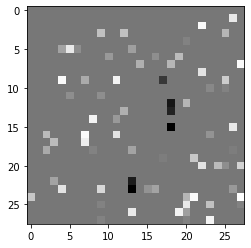

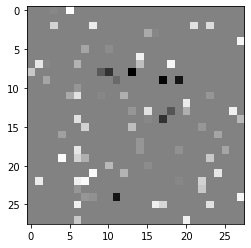

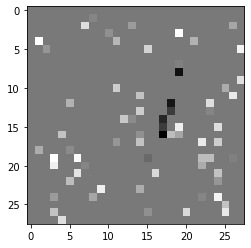

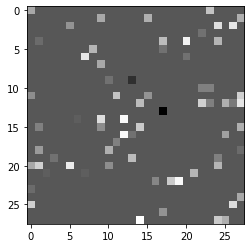

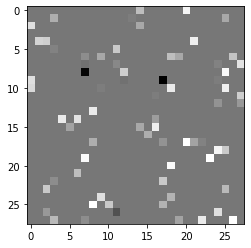

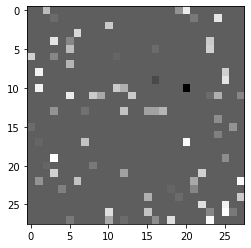

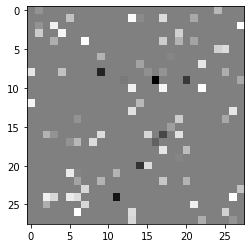

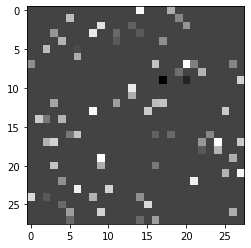

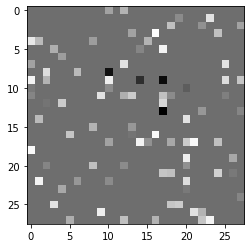

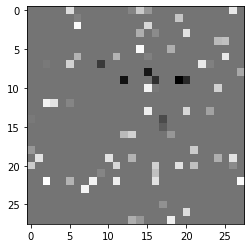

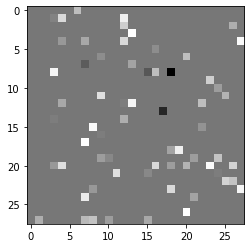

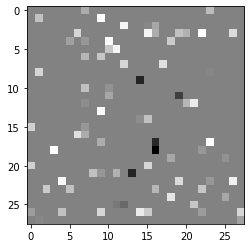

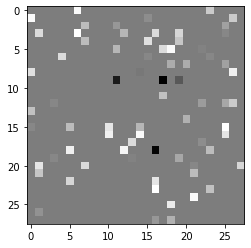

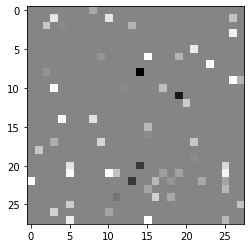

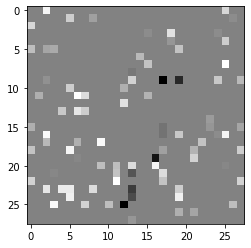

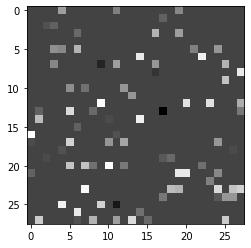

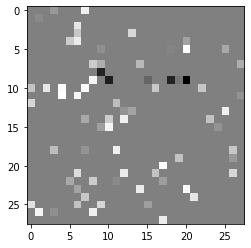

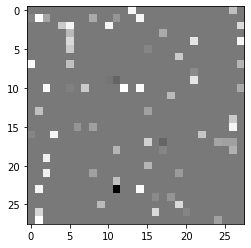

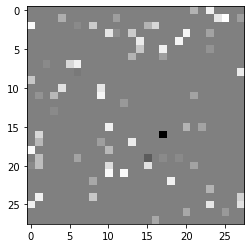

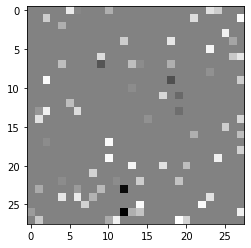

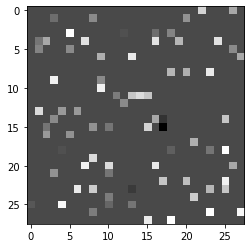

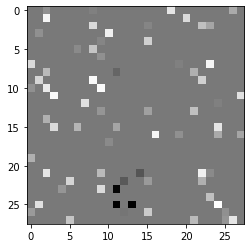

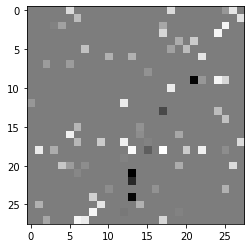

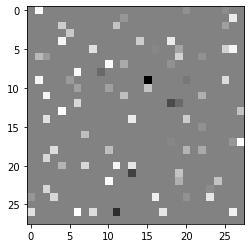

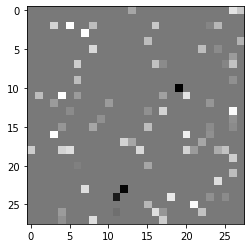

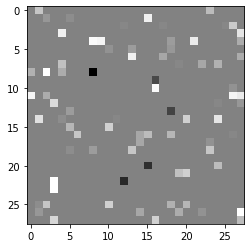

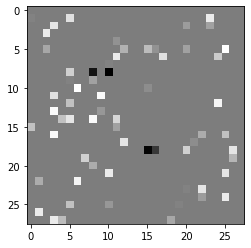

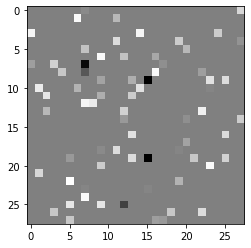

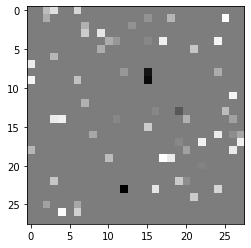

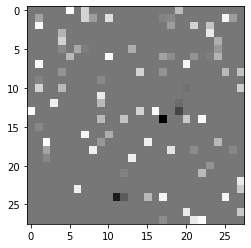

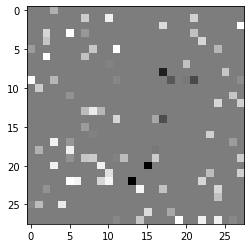

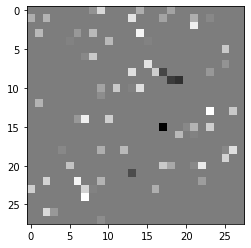

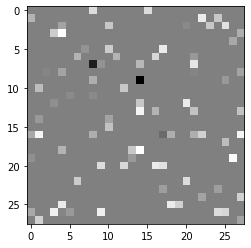

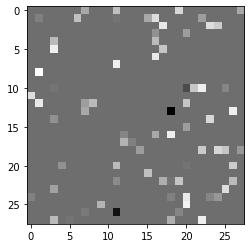

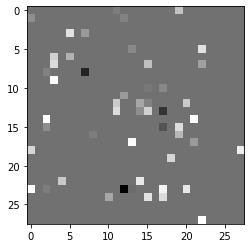

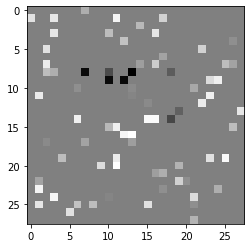

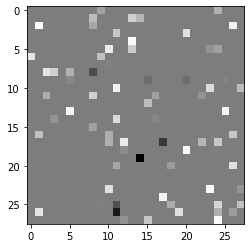

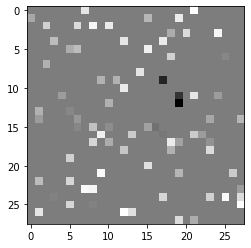

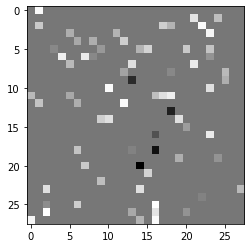

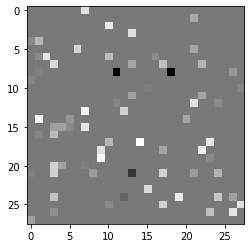

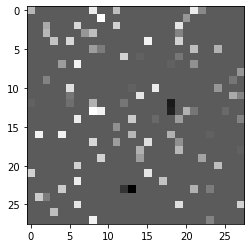

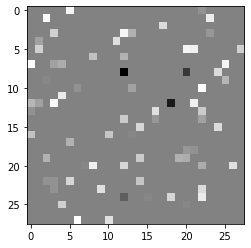

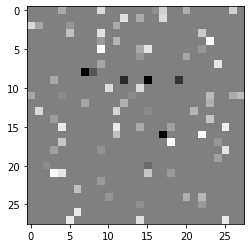

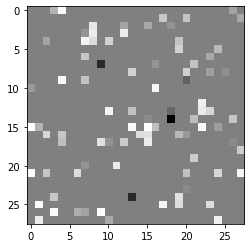

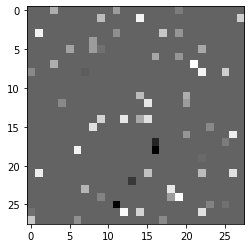

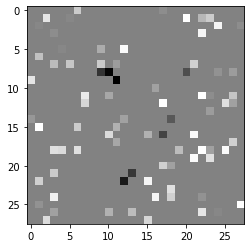

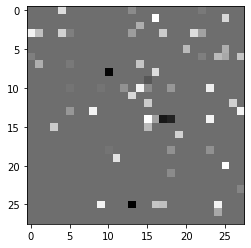

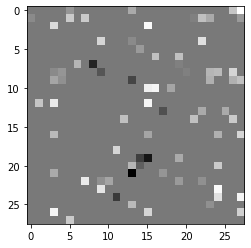

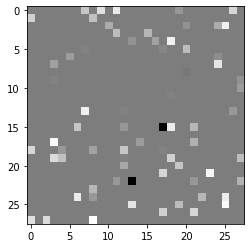

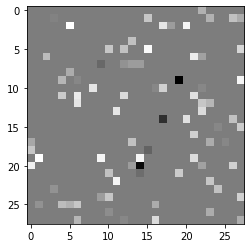

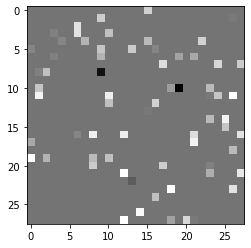

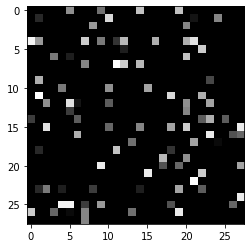

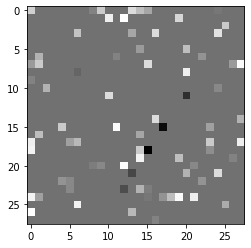

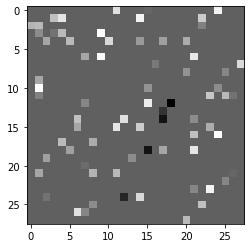

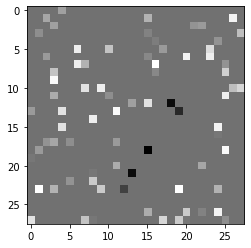

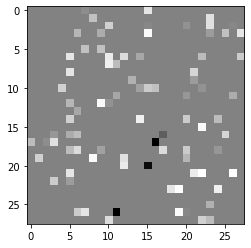

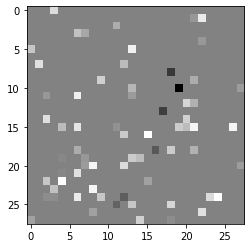

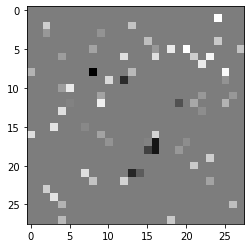

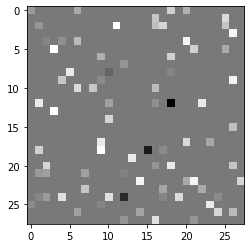

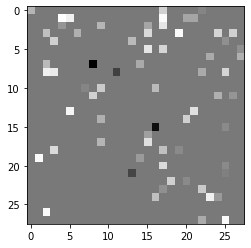

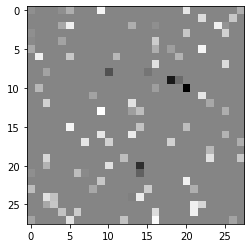

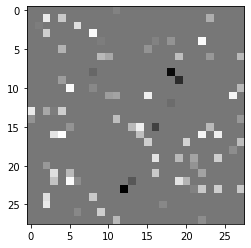

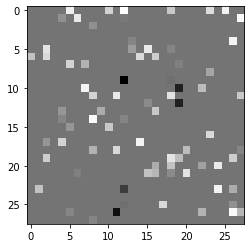

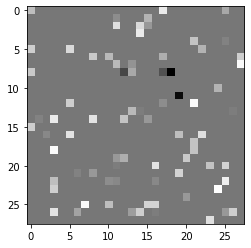

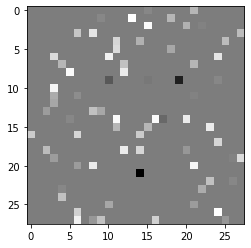

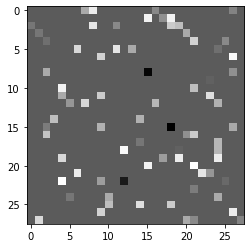

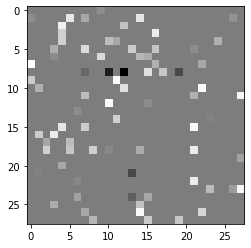

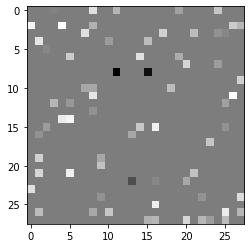

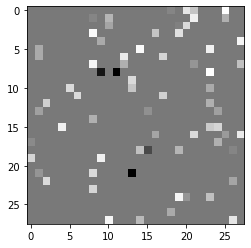

In [5]:
# test
for i in range(100):
    Xr = x_des[i].reshape(28,28)
    plt.imshow(Xr,cmap='gray')
    plt.show()

In [17]:
x_des[5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.2       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.27843137,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [6]:
x_train = x_train.reshape(60000,784)    # 将图片摊平，变成向量

In [7]:
x_test = x_test.reshape(10000,784)     # 对测试集进行同样的处理

In [8]:
x_train = x_train / 255
x_test = x_test / 255 

In [9]:
model = load_model('mnist_model.h5')

In [21]:
# test
X = np.concatenate(x_des, axis=0)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
# test
X = np.array(x_des)
X[9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [10]:
#test
x_test[0].shape

(784,)

In [10]:
def Func(x):
    x_F = x[:]+x_test[0]
    result=model.predict(x_F.reshape(1,784))
    return result[0][7]

最优值： 0.9966078
最优值： 0.996548
最优值： 0.9964598
最优值： 0.9963013
最优值： 0.9963038
最优值： 0.9960962
最优值： 0.99613756
最优值： 0.99606365
最优值： 0.99602926
最优值： 0.99600464
最优值： 0.99574345
最优值： 0.9957261
最优值： 0.99571
最优值： 0.99562764
最优值： 0.9954982
最优值： 0.9952832
最优值： 0.9951315
最优值： 0.9950401
最优值： 0.9946509
最优值： 0.99463564
最优值： 0.9945391
最优值： 0.99420667
最优值： 0.9942048
最优值： 0.9941129
最优值： 0.9939983
最优值： 0.9938905
最优值： 0.9937313
最优值： 0.9937388
最优值： 0.9931443
最优值： 0.9927032
最优值： 0.9926265
最优值： 0.99258435
最优值： 0.9924523
最优值： 0.9920135
最优值： 0.9921251
最优值： 0.9917697
最优值： 0.9917591
最优值： 0.9913298
最优值： 0.991076
最优值： 0.99078584
最优值： 0.99075574
最优值： 0.99049145
最优值： 0.9901992
最优值： 0.9899935
最优值： 0.98992246
最优值： 0.98960054
最优值： 0.9892504
最优值： 0.98872644
最优值： 0.98849326
最优值： 0.98835075
最优值： 0.9878363
最优值： 0.98759604
最优值： 0.98695123
最优值： 0.9870024
最优值： 0.9867993
最优值： 0.985913
最优值： 0.9856808
最优值： 0.98545676
最优值： 0.985391
最优值： 0.9844751
最优值： 0.98438036
最优值： 0.98341537
最优值： 0.9831125
最优值： 0.98320055
最优值： 0.98290986
最优值： 0.

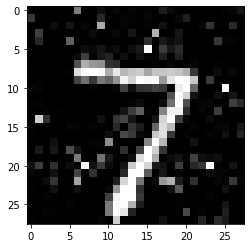

代数： [307.]
平均代数： 307.0


In [15]:
MAX_GENERATION = 2000  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 100  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
E = 0.3
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:
            if Func(BEST_X) < E:
                print(GENERATION)
                BEST = BEST_X + x_test[0]
                print(BEST)
                plt.imshow(BEST.reshape(28,28),cmap='gray')
                plt.show()
                break
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        V[i, j] = 1-(V[i, j]-1)
                    elif V[i, j] <= 1:
                        if V[i, j] + x_test[0][j] > 1:
                            # V +t = 1-(V+t-1)
                            V[i, j] = 1-(V[i, j]+2*x_test[0][j]-1)
                            #print(V[i, j])
                        elif V[i, j] + x_test[0][j] < 0:
                            V[i, j] = -x_test[0][j]
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                # 变异的种子表现更好
                if FITS[i] >= FITS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    if FITS_U[i] < Func(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X))
        if GENERATION == MAX_GENERATION:
            print("当前次未能收敛")
        G[k] = GENERATION
       
print("代数：", G)
print("平均代数：", np.mean(G))

In [12]:
BEST_X

array([ 6.37879659e-04,  2.13887405e-05,  0.00000000e+00,  1.90357282e-04,
       -0.00000000e+00,  3.03464090e-02,  5.99362440e-03,  3.39752736e-04,
        4.44863350e-04,  8.71966232e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  5.42897587e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.23524310e-03,  2.41105300e-04,
        1.03374273e-01,  1.38809341e-02,  2.30213655e-02,  3.83177658e-03,
        2.62637563e-03,  1.00183530e-03, -0.00000000e+00,  8.99997865e-04,
        3.93316055e-04,  1.73405229e-02,  1.34192387e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        6.82732204e-03,  5.37874138e-02,  8.25563475e-02, -0.00000000e+00,
        4.63269716e-03,  3.21634471e-04,  1.04944442e-03,  0.00000000e+00,
        9.79996685e-02,  0.00000000e+00,  0.00000000e+00,  1.01230471e-03,
        1.73237564e-02,  3.35612091e-02,  4.32212488e-04,  4.23852219e-03,
        0.00000000e+00,  

In [14]:
BEST

array([6.37879659e-04, 2.13887405e-05, 0.00000000e+00, 1.90357282e-04,
       0.00000000e+00, 3.03464090e-02, 5.99362440e-03, 3.39752736e-04,
       4.44863350e-04, 8.71966232e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.42897587e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.23524310e-03, 2.41105300e-04,
       1.03374273e-01, 1.38809341e-02, 2.30213655e-02, 3.83177658e-03,
       2.62637563e-03, 1.00183530e-03, 0.00000000e+00, 8.99997865e-04,
       3.93316055e-04, 1.73405229e-02, 1.34192387e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.82732204e-03, 5.37874138e-02, 8.25563475e-02, 0.00000000e+00,
       4.63269716e-03, 3.21634471e-04, 1.04944442e-03, 0.00000000e+00,
       9.79996685e-02, 0.00000000e+00, 0.00000000e+00, 1.01230471e-03,
       1.73237564e-02, 3.35612091e-02, 4.32212488e-04, 4.23852219e-03,
       0.00000000e+00, 7.18358364e-03, 5.00169643e-02, 1.01666773e-02,
      

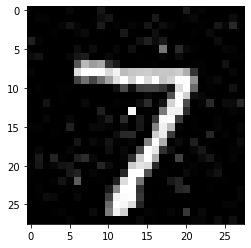

In [13]:
BEST = BEST_X + x_test[0]
plt.imshow(BEST.reshape(28,28),cmap='gray')
plt.show()

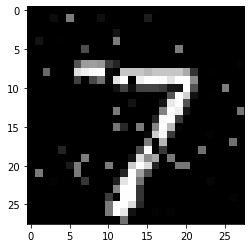

In [14]:
#
BEST = BEST_X + x_test[0]
plt.imshow(BEST.reshape(28,28),cmap='gray')
plt.show()

In [14]:
result=model.predict(BEST_X.reshape(1,784))
result[0]

array([1.2270408e-04, 4.8461512e-05, 1.4535931e-03, 2.8693033e-03,
       1.9180823e-05, 2.3397243e-04, 9.4624681e-07, 9.9419135e-01,
       9.8625685e-05, 9.6184318e-04], dtype=float32)

In [15]:
# test
count = 0
for i in range(784):
    if BEST_X[i] != 0:
        count+=1
print(count)

80


In [55]:
V=[1.175,0.8,1.5,1.32,1.912]
for i in range(5):
                    if V[i] > 1:
                        V[i] =1-(V[i]-1)
                       
V = [round(i,3) for i in V]
V

[0.825, 0.8, 0.5, 0.68, 0.088]